In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import and inspect the maths data
maths_df = pd.read_csv('data/Maths.csv')

# First 5 rows of the data
maths_df.head()
# Last 5 rows 
maths_df.tail()

maths_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
#Import and inspect Portuguese data
portuguese_df = pd.read_csv('data/Portuguese.csv')

# First 5 rows of the data
portuguese_df.head()

# Last 5 rows of data
portuguese_df.tail()

# check the data types
portuguese_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

<Figure size 720x432 with 0 Axes>

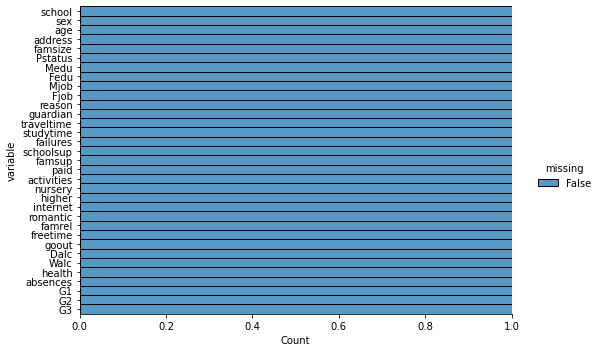

In [5]:
#Visualize missing values for maths data 
plt.figure(figsize=(10,6))
sns.displot(
    data=maths_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)


<Figure size 720x432 with 0 Axes>

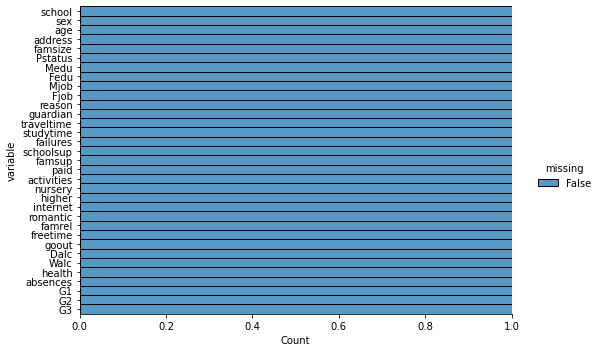

In [6]:
#Visualize missing values for portuguese data
plt.figure(figsize=(10,6))
sns.displot(
    data=portuguese_df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.5
)


# Exploratory Analysis

In [7]:
#Describing visualization used for maths data
maths_df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
age,395.000000,16.696203,1.276043,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,395.000000,2.749367,1.094735,0.000000,2.000000,3.000000,4.000000,4.000000
Fedu,395.000000,2.521519,1.088201,0.000000,2.000000,2.000000,3.000000,4.000000
traveltime,395.000000,1.448101,0.697505,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,395.000000,2.035443,0.839240,1.000000,1.000000,2.000000,2.000000,4.000000
failures,395.000000,0.334177,0.743651,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,395.000000,3.944304,0.896659,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,395.000000,3.235443,0.998862,1.000000,3.000000,3.000000,4.000000,5.000000
goout,395.000000,3.108861,1.113278,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,395.000000,1.481013,0.890741,1.000000,1.000000,1.000000,2.000000,5.000000


In [8]:
#Describing visualization used for portuguese data
portuguese_df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
age,649.000000,16.744222,1.218138,15.000000,16.000000,17.000000,18.000000,22.000000
Medu,649.000000,2.514638,1.134552,0.000000,2.000000,2.000000,4.000000,4.000000
Fedu,649.000000,2.306626,1.099931,0.000000,1.000000,2.000000,3.000000,4.000000
traveltime,649.000000,1.568567,0.748660,1.000000,1.000000,1.000000,2.000000,4.000000
studytime,649.000000,1.930663,0.829510,1.000000,1.000000,2.000000,2.000000,4.000000
failures,649.000000,0.221880,0.593235,0.000000,0.000000,0.000000,0.000000,3.000000
famrel,649.000000,3.930663,0.955717,1.000000,4.000000,4.000000,5.000000,5.000000
freetime,649.000000,3.180277,1.051093,1.000000,3.000000,3.000000,4.000000,5.000000
goout,649.000000,3.184900,1.175766,1.000000,2.000000,3.000000,4.000000,5.000000
Dalc,649.000000,1.502311,0.924834,1.000000,1.000000,1.000000,2.000000,5.000000


In [9]:
#### Exploratory Visualization

# Split values in maths dataframe into objects and integers
categorical_features_maths = [i for i in maths_df.columns if maths_df.dtypes[i]== 'object']
numerical_feautures_maths = [i for i in maths_df.columns if maths_df.dtypes[i]== 'int']

#Split values in portuguese dataframe into objects and integers
categorical_features_portuguese = [i for i in portuguese_df.columns if portuguese_df.dtypes[i]== 'object']
numerical_feautures_portuguese = [i for i in portuguese_df.columns if portuguese_df.dtypes[i]== 'int']

In [10]:
# Converting the categorical variables into dummy variables

df_maths_dummy = pd.get_dummies(maths_df)
df_portuguese_dummy = pd.get_dummies(portuguese_df)

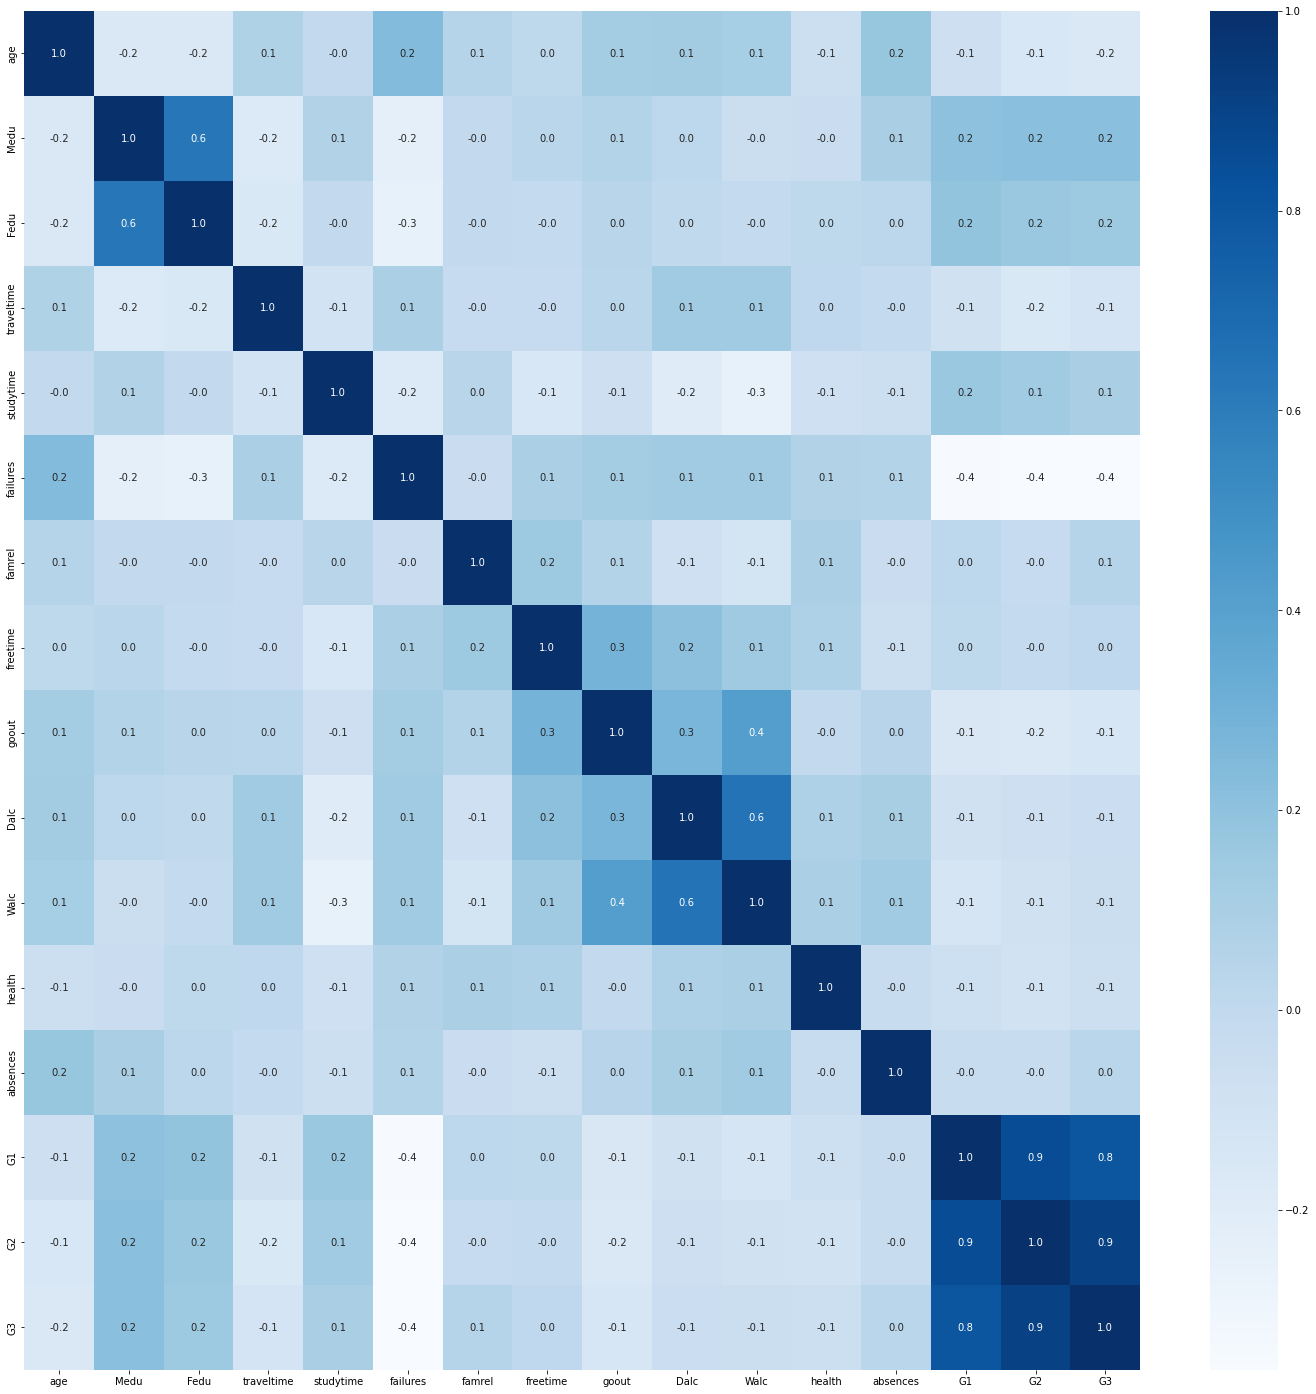

In [11]:
# Correlation Heatmap of maths data

plt.figure(figsize=(25,25))
math_heatmap = sns.heatmap(maths_df.corr(), annot=True,cbar=True,cmap='Blues', fmt='.1f')

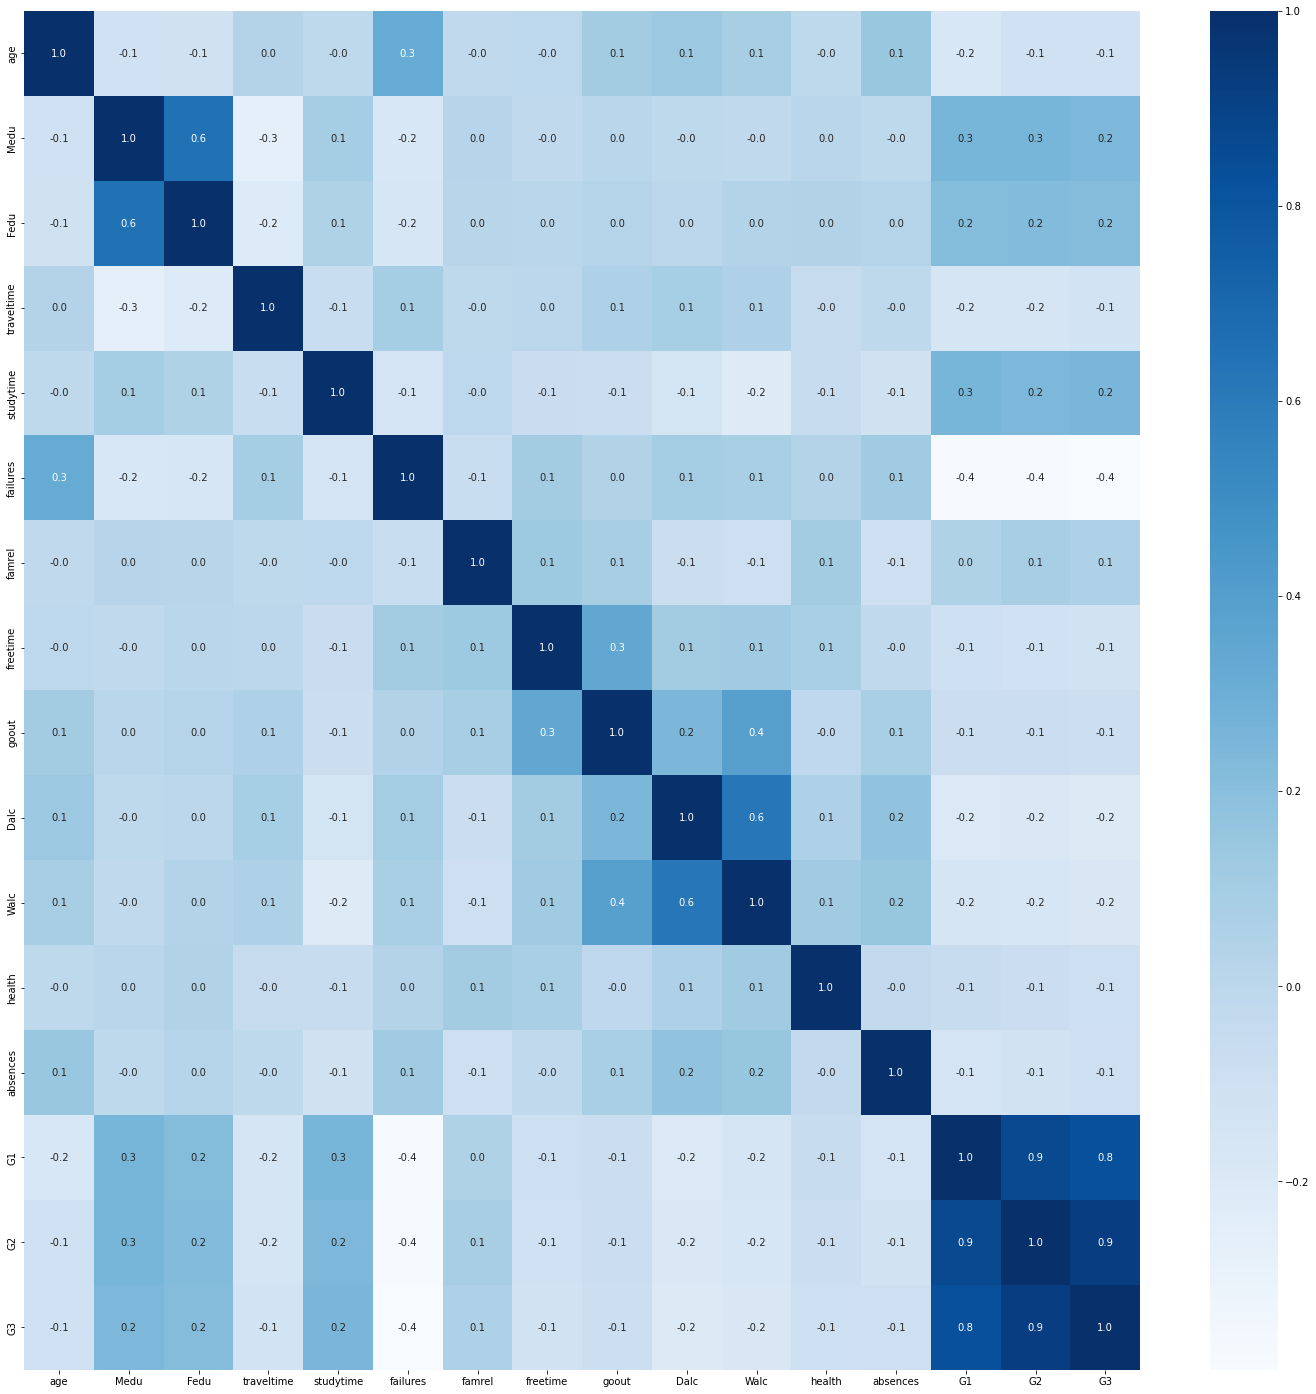

In [12]:
# Correlation Heatmap of maths data

plt.figure(figsize=(25,25))
portuguese_heatmap = sns.heatmap(portuguese_df.corr(), annot=True,cbar=True,cmap='Blues', fmt='.1f')

## RandomForestClassifier for Maths

In [13]:
#Convert categorical variables into dummy/indicator variables
X= df_maths_dummy.drop(['G1','G2','G3'], axis=1)
y= df_maths_dummy.G3
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,1,0,0,1,0,1,1,0,1,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,1,0,1,0,0,1,1,0,1,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,1,0,0,1,0,1,1,0


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
%matplotlib inLine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [16]:
# Create the test and train data for maths
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 0)


In [17]:
#Scale the features and apply to train and test data sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Run the Random Forest and see metrics
clf = RandomForestClassifier(n_estimators = 12, criterion='entropy',random_state=0).fit(X_train,y_train)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')
y_pred = clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))

Training Score: 0.9936708860759493
Testing Score: 0.1518987341772152
Model Accuracy : 15.19%
Model F1-Score : 15.96%
Cross Val Accuracy: 18.36 %
Cross Val Standard Deviation: 1.93 %
              precision    recall  f1-score   support

           0       0.27      0.25      0.26        12
           4       0.00      1.00      0.00         0
           5       0.00      1.00      0.00         0
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         2
           8       0.29      0.18      0.22        11
           9       0.00      0.00      0.00         3
          10       0.44      0.24      0.31        17
          11       0.00      0.00      0.00        13
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.14      0.33      0.20         3
          15       0.00      0.00      0.00         7
          16       0.00      1.00      0.00         0
       

/Users/hristobustamante/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Training Score: 0.6329113924050633
Testing Score: 0.08860759493670886


/Users/hristobustamante/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[0.04155953 0.04147403 0.03770011 0.01809454 0.03329142 0.02837679
 0.02900039 0.03638479 0.03899898 0.02626756 0.03934521 0.04107698
 0.07202119 0.00604707 0.00494435 0.02228049 0.01480819 0.01418115
 0.01411112 0.02103869 0.01491716 0.00586413 0.01166139 0.00973624
 0.00652334 0.01779583 0.01376675 0.00864877 0.00463853 0.00146521
 0.01169224 0.0183121  0.00422078 0.01669823 0.01116374 0.00477824
 0.02156689 0.0084521  0.0154283  0.00509575 0.0065871  0.00865135
 0.01739847 0.01118018 0.03041155 0.01388182 0.02117364 0.01840804
 0.01290081 0.01103224 0.00105474 0.00220268 0.00646928 0.0122778
 0.01773715 0.01520486]


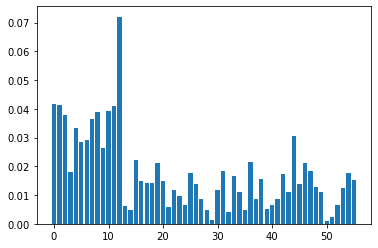

In [18]:
#Find the feature importances 
features = clf.feature_importances_
print(features)
plt.bar(x=range(len(features)), height=features)
plt.show()

In [19]:
from sklearn.feature_selection import SelectFromModel

In [20]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,  True, False, False, False, False, False, False,
       False, False])

In [21]:
X_selected_train, X_selected_test, y_train,y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [22]:
clf = RandomForestClassifier(n_estimators = 12, criterion='entropy',random_state=0).fit(X_selected_train_scaled,y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')
y_pred = clf.predict(X_selected_test_scaled)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = clf, X = X_selected_train_scaled, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))

Training Score: 0.9898648648648649
Testing Score: 0.1717171717171717
Model Accuracy : 17.17%
Model F1-Score : 18.81%
Cross Val Accuracy: 16.55 %
Cross Val Standard Deviation: 2.91 %
              precision    recall  f1-score   support

           0       0.50      0.22      0.31        18
           5       0.00      1.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.12      0.09      0.11        11
           9       0.14      0.25      0.18         4
          10       0.29      0.24      0.26        25
          11       0.07      0.08      0.07        12
          12       0.12      0.14      0.13         7
          13       0.12      0.17      0.14         6
          14       0.00      0.00      0.00         6
          15       0.40      0.40      0.40         5
          16       0.00      1.00      0.00         0
          17       0.00      0.00      0.00         1
       

/Users/hristobustamante/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


ValueError: Found input variables with inconsistent numbers of samples: [316, 296]

## RandomForestClassifier for Portuguese


In [ ]:
X= df_portuguese_dummy.drop(['G1','G2','G3'], axis=1)
y= df_portuguese_dummy.G3
X

In [ ]:
# Create the test and train data for portuguese data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state = 0)

In [ ]:
#Scale the features and apply to train and test data sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Run the Random Forest and see metrics
clf = RandomForestClassifier(n_estimators = 12, criterion='entropy',random_state=0).fit(X_train,y_train)

print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')
y_pred = clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))

In [ ]:
#Find the feature importances 
features = clf.feature_importances_
print(features)
plt.bar(x=range(len(features)), height=features)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
sel.get_support()


In [ ]:
X_selected_train, X_selected_test, y_train,y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
clf = RandomForestClassifier(n_estimators = 12, criterion='entropy',random_state=0).fit(X_selected_train_scaled,y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')
y_pred = clf.predict(X_selected_test_scaled)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = clf, X = X_selected_train_scaled, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))


## Oversampling by SMOTE for Imbalance Classification

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 
from sklearn.pipeline import make_pipeline



In [22]:
sm = SMOTE()

In [23]:
X, y = make_classification(
    n_samples=7000,
    n_features=30,
    n_informative=11,
    n_redundant=0,
    n_classes=21,
    class_sep=1.0,
    random_state=1
)

In [25]:
X_r,y_r = sm.fit_resample(X,y)

/Users/hristobustamante/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


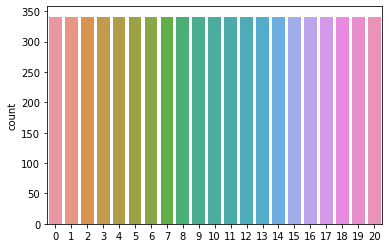

In [26]:
# Visualize the data between the grades
sns.countplot(y_r)
plt.show()

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_r,y_r,test_size=0.20,stratify=y_r,random_state=0)

In [29]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))

Model Accuracy : 25.68%
Model F1-Score : 26.09%
Cross Val Accuracy: 24.27 %
Cross Val Standard Deviation: 1.37 %
              precision    recall  f1-score   support

           0       0.38      0.20      0.26       133
           1       0.40      0.21      0.28       127
           2       0.32      0.25      0.28        89
           3       0.36      0.23      0.28       109
           4       0.25      0.21      0.23        80
           5       0.26      0.28      0.27        65
           6       0.31      0.26      0.28        80
           7       0.34      0.26      0.30        87
           8       0.24      0.29      0.26        55
           9       0.21      0.22      0.21        65
          10       0.18      0.22      0.20        55
          11       0.26      0.30      0.28        60
          12       0.12      0.17      0.14        48
          13       0.22      0.28      0.25        54
          14       0.26      0.33      0.30        54
          15       0.2